# БФБО-05-23 Баранов Арсений Юрьевич

Напишите программы с использованием Python или C# для решения
следующих задач:
1. Рассматривается закрытый ареал, в котором обитают два вида —
травоядные («жертвы») и хищники. Предполагается, что животные не
иммигрируют и не эмигрируют, и что еды для травоядных животных имеется
с избытком. Тогда уравнение изменения количества жертв (без учёта
хищников) принимает вид:   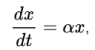  
где 𝛼 - коэффициент рождаемости жертв, 𝑥 - величина популяции жертв,
скорость прироста популяции жертв.
Пока хищники не охотятся, они вымирают, следовательно, уравнение для
численности хищников (без учёта численности жертв) принимает вид:   
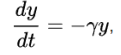  
где 𝛾 — коэффициент убыли хищников, 𝑦 — величина популяции хищников,
— скорость прироста популяции хищников.
При встречах хищников и жертв (частота которых прямо пропорциональна
величине 𝑥𝑦) происходит убийство жертв с коэффициентом 𝛽, сытые хищники
способны к воспроизводству с коэффициентом 𝛿. С учётом этого, система
уравнений модели такова:  
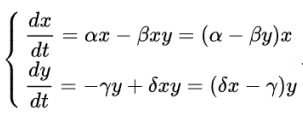  
Задание:
Запрограммировать модель Хищник-жертва и провести численные
эксперименты. Построить график полученных результатов.

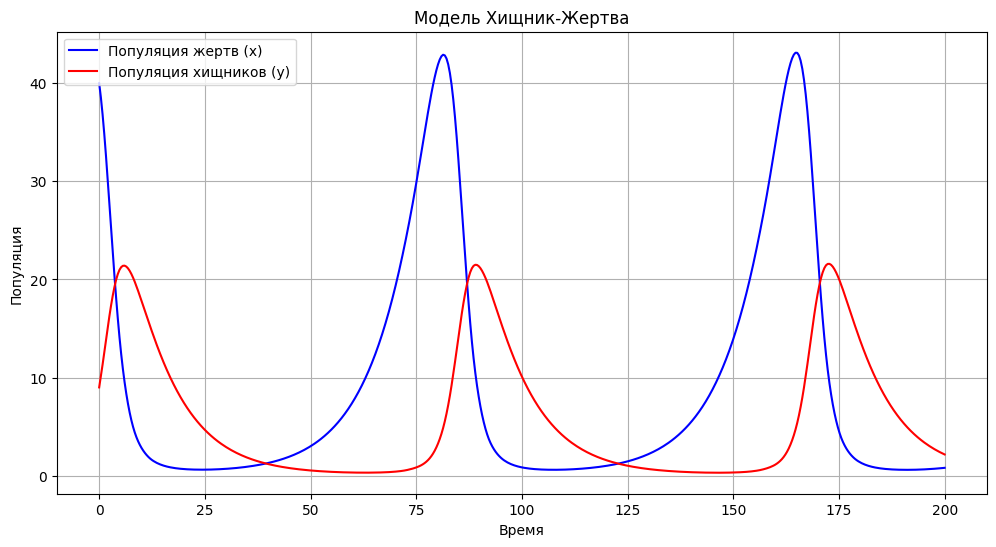

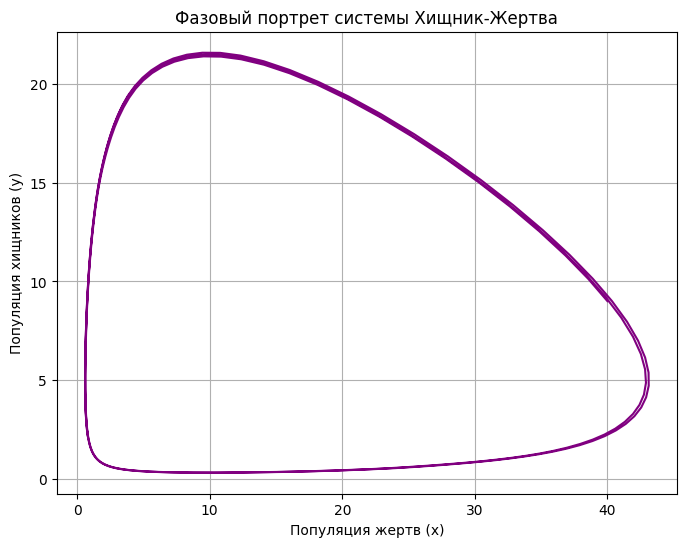

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Параметры системы
a = 0.1  # коэффициент рождаемости жертв
b = 0.02  # коэффициент гибели жертв из-за хищников
g = 0.1  # коэффициент убыли хищников
d = 0.01  # коэффициент размножения хищников

# Функция, задающая систему дифференциальных уравнений
def lotka_volterra(t, z):
    x, y = z
    dxdt = a * x - b * x * y
    dydt = -g * y + d * x * y
    return [dxdt, dydt]

# Начальные условия
x0 = 40  # начальная популяция жертв
y0 = 9   # начальная популяция хищников

# Время моделирования
t_span = (0, 200)  # от 0 до 200
t_eval = np.linspace(*t_span, 500)  # точки для вывода результата

# Решение системы
sol = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label="Популяция жертв (x)", color="blue")
plt.plot(sol.t, sol.y[1], label="Популяция хищников (y)", color="red")
plt.xlabel("Время")
plt.ylabel("Популяция")
plt.title("Модель Хищник-Жертва")
plt.legend()
plt.grid()
plt.show()